# Project Description

The goal of this project is to use a Long Short Term Memory (LSTM) recurrent neural network model to accuratly predict the closing stock price of Nike (NKE) using the past 60 day stock price. I obtained the 60 day stock price data from Yahoo Finance

Within each code block I will give a brief description of the steps I took to achive my goal.

In [1]:
#Import all necessary packages

from datetime import datetime
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import yfinance as yf
import math
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [2]:
#upload necesarry dataset and set it to variable nke

nke = yf.download('NKE', start=datetime(2019, 11, 1), end=datetime(2023, 7, 6))
nke.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-28,113.339996,113.750000,112.120003,113.029999,113.029999,6766000
2023-06-29,113.599998,114.269997,112.610001,113.370003,113.370003,12465500
2023-06-30,111.589996,112.250000,109.800003,110.370003,110.370003,19614400
2023-07-03,111.059998,111.300003,109.110001,109.110001,109.110001,5734200
2023-07-05,108.620003,108.910004,106.540001,107.099998,107.099998,10405300


In [3]:
nke.tail


<bound method NDFrame.tail of                   Open        High         Low       Close   Adj Close   
Date                                                                     
2019-11-01   90.180000   90.529999   89.000000   89.180000   85.992035  \
2019-11-04   90.129997   90.559998   89.320000   89.860001   86.647713   
2019-11-05   90.150002   90.339996   89.540001   89.879997   86.666977   
2019-11-06   90.639999   90.720001   88.739998   89.480003   86.281281   
2019-11-07   90.470001   90.599998   89.769997   90.400002   87.168396   
...                ...         ...         ...         ...         ...   
2023-06-28  113.339996  113.750000  112.120003  113.029999  113.029999   
2023-06-29  113.599998  114.269997  112.610001  113.370003  113.370003   
2023-06-30  111.589996  112.250000  109.800003  110.370003  110.370003   
2023-07-03  111.059998  111.300003  109.110001  109.110001  109.110001   
2023-07-05  108.620003  108.910004  106.540001  107.099998  107.099998   

       

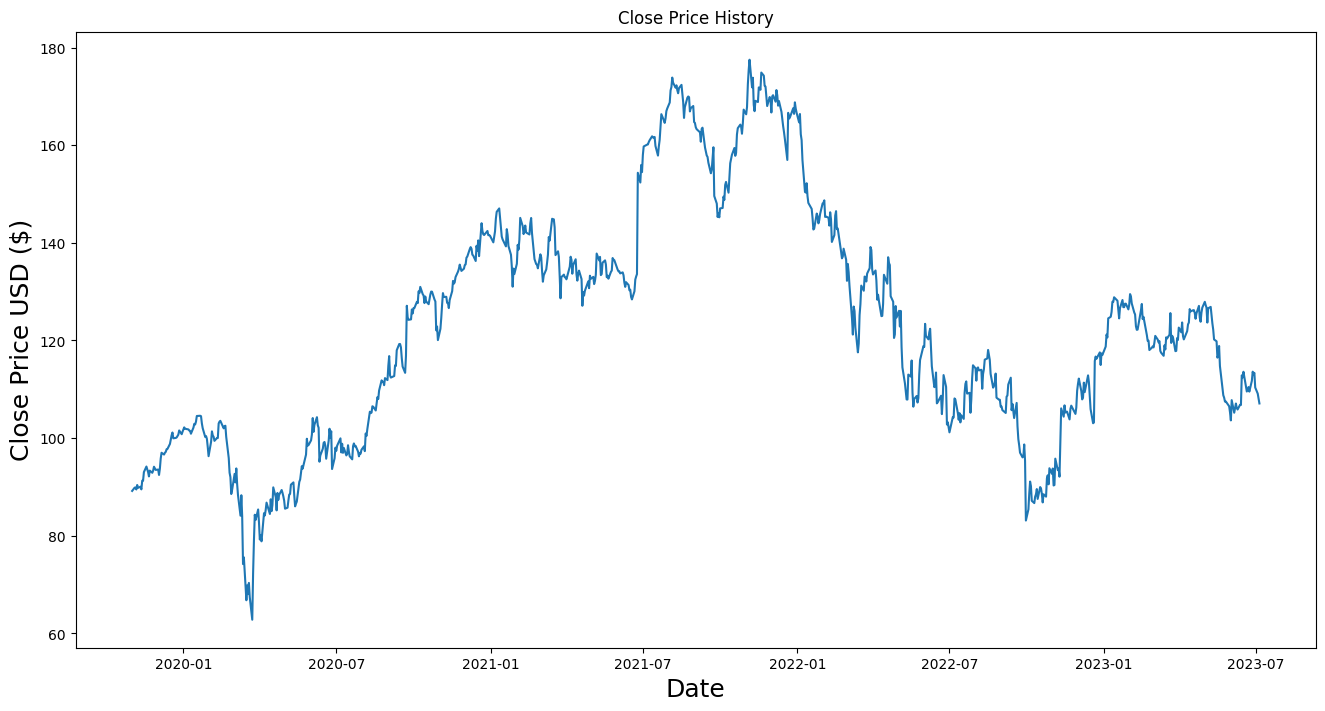

In [4]:
#visulaize the closing price history

plt.figure(figsize = (16, 8))
plt.title("Close Price History")
plt.plot(nke['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show()

In [5]:
nke_close = nke.filter(['Close'])

In [6]:
df = nke_close.values

In [7]:
training_df_len = math.ceil(len(df) * .8 )

training_df_len

739

In [8]:
#scale data 
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(df)
scaled_data

array([[0.22997125],
       [0.23589925],
       [0.23607357],
       [0.23258657],
       [0.24060678],
       [0.23546334],
       [0.23755562],
       [0.23276089],
       [0.24836547],
       [0.24819108],
       [0.26362133],
       [0.27355943],
       [0.26859038],
       [0.26370853],
       [0.25594984],
       [0.26623658],
       [0.26240087],
       [0.26614945],
       [0.27321072],
       [0.26754424],
       [0.26815447],
       [0.25856509],
       [0.26954933],
       [0.28759483],
       [0.29814316],
       [0.29491761],
       [0.29823036],
       [0.29971234],
       [0.30441987],
       [0.30485571],
       [0.31392206],
       [0.32124491],
       [0.32926512],
       [0.33432137],
       [0.32394736],
       [0.32464478],
       [0.32551653],
       [0.33048558],
       [0.33798276],
       [0.33127021],
       [0.33571615],
       [0.34347484],
       [0.34103392],
       [0.34024936],
       [0.33981345],
       [0.33780843],
       [0.3371982 ],
       [0.332

In [9]:
#create training data set
#create the scaled train data set
train_data = scaled_data[0:training_df_len, :]
#split data into x train and y_train data sets
x_train = [] #independent training variables
y_train = [] #dependent or target variables

for i in range (60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.22997125, 0.23589925, 0.23607357, 0.23258657, 0.24060678,
       0.23546334, 0.23755562, 0.23276089, 0.24836547, 0.24819108,
       0.26362133, 0.27355943, 0.26859038, 0.26370853, 0.25594984,
       0.26623658, 0.26240087, 0.26614945, 0.27321072, 0.26754424,
       0.26815447, 0.25856509, 0.26954933, 0.28759483, 0.29814316,
       0.29491761, 0.29823036, 0.29971234, 0.30441987, 0.30485571,
       0.31392206, 0.32124491, 0.32926512, 0.33432137, 0.32394736,
       0.32464478, 0.32551653, 0.33048558, 0.33798276, 0.33127021,
       0.33571615, 0.34347484, 0.34103392, 0.34024936, 0.33981345,
       0.33780843, 0.3371982 , 0.33214196, 0.3431262 , 0.34975155,
       0.34861828, 0.35367453, 0.36378695, 0.36422286, 0.36343824,
       0.3506233 , 0.34199286, 0.32638828, 0.32787033, 0.32290122])]
[0.3085171708107507]

[array([0.22997125, 0.23589925, 0.23607357, 0.23258657, 0.24060678,
       0.23546334, 0.23755562, 0.23276089, 0.24836547, 0.24819108,
       0.26362133, 0.27355943, 0.268

In [10]:
#convert the x_train adn y_train to numpy models
x_train, y_train = np.array(x_train), np.array(y_train)

#reshape the data 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape #3 dimmensinoal


(679, 60, 1)

In [11]:
#build Lstm model
model =Sequential()
model.add(LSTM(50, return_sequences =True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))


In [12]:
#compile the model
model.compile(optimizer ='adam', loss = 'mean_squared_error')


In [13]:
#train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)


2023-07-07 19:34:05.175025: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


679/679 [==============================] - 6s 8ms/step - loss: 0.0064


In [14]:
#create the testing data set 
#create new array containg scaleed values 
test_data = scaled_data[training_df_len - 60: , :]
#create the datasets x_test and y_test
x_test = []
y_test = df[training_df_len:, :] #all of the values that we want our model to predict (actual test values)

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [15]:
#convert the data to a numpy array
x_test = np.array(x_test)


In [16]:
#reshape data 
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))


In [17]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) #unscaling values 



6/6 [==============================] - 0s 5ms/step


In [18]:
#evaluate model (get the root mean squared error RMSE)
rmse = np.sqrt(np.mean(predictions - y_test) **2 )
rmse # value of zero for mse means that predictions were perfect (100%)
#1.31 is very good

1.3144765936810037

/var/folders/9t/1wc6rw8s42dgkg2ynsqn0f440000gn/T/ipykernel_21359/2276881426.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


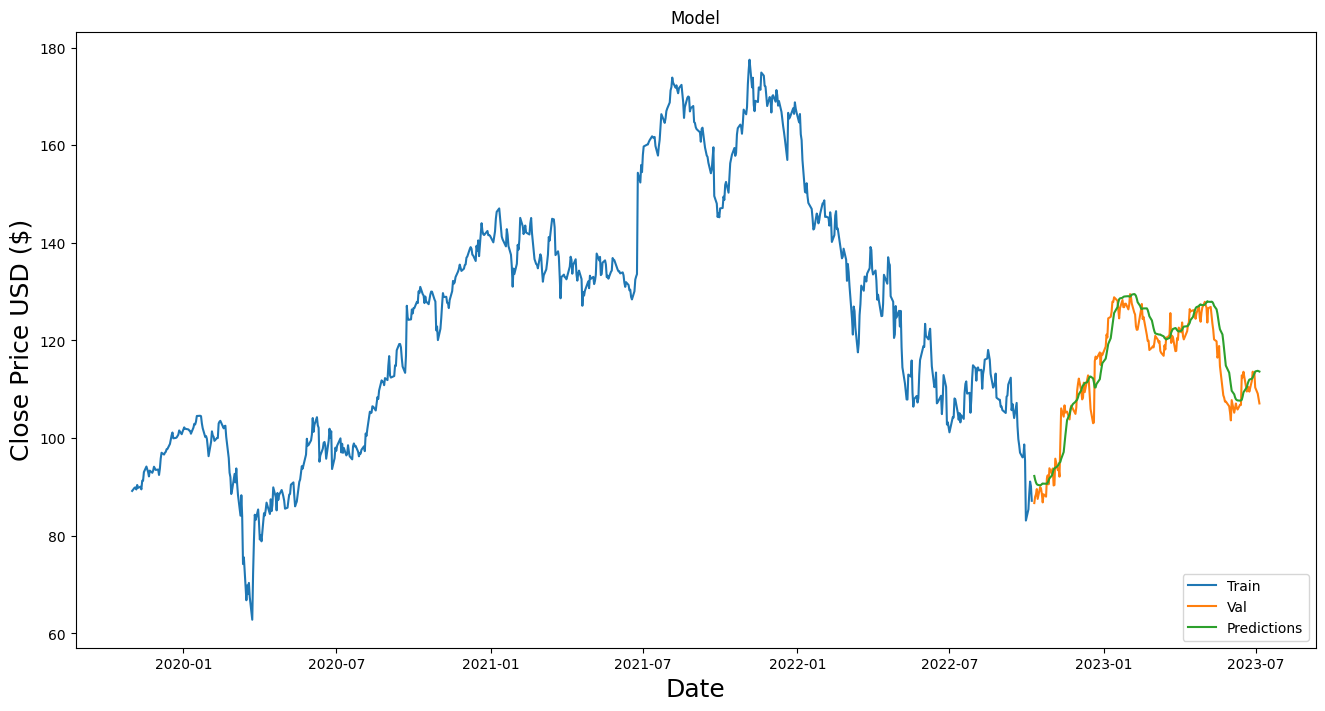

In [19]:
#plot the data 
train = nke_close[:training_df_len]
valid = nke_close[training_df_len:]
valid['Predictions'] = predictions

#Visualize the data 
plt.figure(figsize = (16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [20]:
#show to acutal (val) and predicted closing stock price for nke
valid.tail



<bound method NDFrame.tail of                  Close  Predictions
Date                               
2022-10-10   86.690002    92.248222
2022-10-11   87.989998    91.479584
2022-10-12   88.510002    90.912361
2022-10-13   89.559998    90.554573
2022-10-14   87.550003    90.438133
...                ...          ...
2023-06-28  113.029999   112.807251
2023-06-29  113.370003   113.228432
2023-06-30  110.370003   113.654129
2023-07-03  109.110001   113.788719
2023-07-05  107.099998   113.636940

[184 rows x 2 columns]>

In [21]:
#Get the quote

#create new dataframe
new_df = nke.filter(['Close'])
#get the last 60 day closing price value and convert into array
last_60_days = new_df[-60:].values
#scale the data to be values between 0 and 1
last_60_scaled = scaler.transform(last_60_days)
#create and empty list
X_test = []
#append the last 60 days to the empty list
X_test.append(last_60_scaled)
#convert X_test dataset to a numpy array
X_test = np.array(X_test)
#reshape the data 
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#get the predicted scaled price 
pred_price = model.predict(X_test)
#undo scaling 
pred_price = scaler.inverse_transform(pred_price)
#print predicted price
print(pred_price)



1/1 [==============================] - 0s 11ms/step
[[113.15566]]


In [22]:
#The model prediction value for the very next day (7/6/2023) of NKE stock price is 113.192

#The actual stock price for NKE on (7/6/2023) is 105.29 